# Loan Prediction Problem

Let's start with importing required dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline

In [2]:
df=pd.read_csv('train.csv')

In [3]:
df.sample(10)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
288,LP001931,Female,No,0,Graduate,No,4124,0.0,115.0,360.0,1.0,Semiurban,Y
307,LP001994,Female,No,0,Graduate,No,2400,1863.0,104.0,360.0,0.0,Urban,N
166,LP001577,Female,Yes,0,Graduate,No,4583,0.0,112.0,360.0,1.0,Rural,N
334,LP002103,NaN,Yes,1,Graduate,Yes,9833,1833.0,182.0,180.0,1.0,Urban,Y
431,LP002379,Male,No,0,Graduate,No,6500,0.0,105.0,360.0,0.0,Rural,N
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
304,LP001978,Male,No,0,Graduate,No,4000,2500.0,140.0,360.0,1.0,Rural,Y
412,LP002328,Male,Yes,0,Not Graduate,No,6096,0.0,218.0,360.0,0.0,Rural,N
149,LP001520,Male,Yes,0,Graduate,No,4860,830.0,125.0,360.0,1.0,Semiurban,Y
574,LP002863,Male,Yes,3+,Graduate,No,6406,0.0,150.0,360.0,1.0,Semiurban,N


In [4]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
df.describe()
#this gives description of numerical attributes

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


First Impression Insights:

1. LoanAmount has few missing values (614-592=22).
2. Loan_Amount_Term has 14 missing values.
3. Credit_History also has few missing values.
4. Nearly 84% of applicants have a credit history. (Credit History 1=Yes, 0=No)
5. ApplicantIncome and Coapplicantincome are fairly distributed.

To get an idea about the skewness of data we can compare Mean value to Median (i.e 50%)

to check frequency distribution on Non-Numerical values we can use df['Col'].value_counts()


In [6]:
df['Property_Area'].value_counts()


Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [7]:
df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [8]:
df.sample(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
158,LP001546,Male,No,0,Graduate,NaN,2980,2083.0,120.0,360.0,1.0,Rural,Y
192,LP001657,Male,Yes,0,Not Graduate,No,6033,0.0,160.0,360.0,1.0,Urban,N
465,LP002494,Male,No,0,Graduate,No,6000,0.0,140.0,360.0,1.0,Rural,Y
218,LP001732,Male,Yes,2,Graduate,NaN,5000,0.0,72.0,360.0,0.0,Semiurban,N
40,LP001119,Male,No,0,Graduate,No,3600,0.0,80.0,360.0,1.0,Urban,N


#Distribution Analysis

Let's study the distribution of various variables. We will start with numerical columns namely LoanAmount and ApplicantIncome.

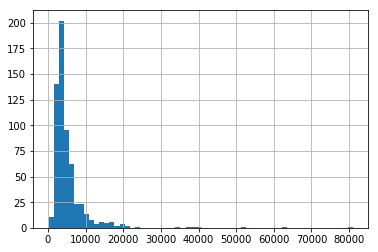

In [9]:
#plotting Histogram
df['ApplicantIncome'].hist(bins=60)

We can see that there are few extreme values. Now let's look at the Box Plot for fare.

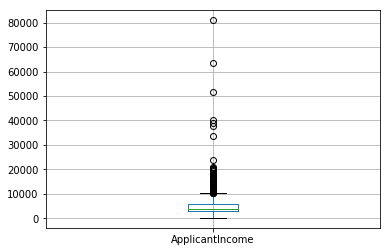

In [10]:
df.boxplot(column='ApplicantIncome')

This confirms the presence of extreme values of income. This is beacuse of disparity in society because of education. Lets segregate them by education.


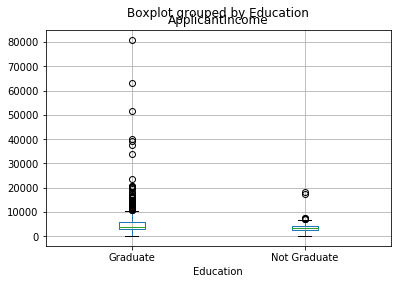

In [11]:
df.boxplot(column='ApplicantIncome',by='Education')

The mean income of both are nearly equal. Graduates still have some extreme values which we can see here as outliers.

Let's look at the Historgram and Boxplot of LoanAmount using following command.

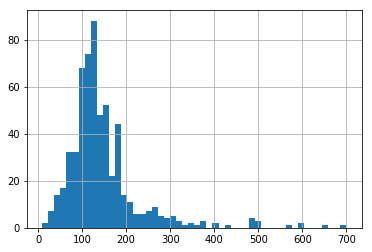

In [12]:
df['LoanAmount'].hist(bins=50)

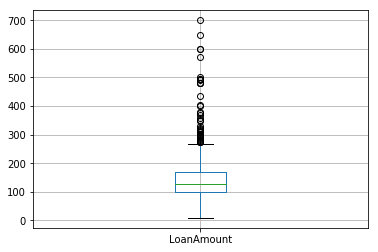

In [13]:
df.boxplot(column='LoanAmount')

There are some extreme values in this too. Both LoanAmount and ApplicantIncome need some data munging. Also there are missing values that we need to take care of.

For now, Let's check the Categorical Variables



In [14]:
df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [15]:
pd.crosstab(df['Credit_History'],df['Loan_Status'])

Loan_Status,N,Y
Credit_History,,
0.0,82,7
1.0,97,378


In [16]:
pd.crosstab(df['Gender'],df['Loan_Status'])

Loan_Status,N,Y
Gender,,
Female,37,75
Male,150,339


In [17]:
#Now lets see if there are any missing values in the data
df.isnull().any()


Loan_ID              False
Gender                True
Married               True
Dependents            True
Education            False
Self_Employed         True
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount            True
Loan_Amount_Term      True
Credit_History        True
Property_Area        False
Loan_Status          False
dtype: bool

In [18]:
 df.apply(lambda x: sum(x.isnull()),axis=0)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

There are many ways to substitute missing values. The simplest one is to replace them with the mean of the column.

In [19]:
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean(), inplace=True)

In [20]:
#Now let's check distribution of self emplyed column
df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [21]:
df['Credit_History'].fillna('1',inplace=True)

In [22]:
df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [25]:
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)

In [26]:
df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [27]:
df['Gender'].fillna('Male',inplace=True)

In [28]:
df['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [29]:
df['Married'].fillna('Yes',inplace=True)

In [30]:
df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [31]:
df['Dependents'].fillna('0',inplace=True)

In [32]:
df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [33]:
df['Self_Employed'].fillna('No',inplace=True)

In [38]:
#dropping the column Loan_ID since it won't help much
df1=df.drop('Loan_ID', axis=1)

In [39]:
df1.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1,2,1


In [40]:
 df1.apply(lambda x: sum(x.isnull()),axis=0)

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Now we have taken care of missing values

Since, SKLEARN requires all inputs to be numeric we should convert all our categorical variables into numeric by encoding the categories. This can be done using the following code.

In [35]:
from sklearn.preprocessing import LabelEncoder
var_mod=['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
le=LabelEncoder()
for i in var_mod:
    df[i]=le.fit_transform(df[i])
df.dtypes

Loan_ID               object
Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History        object
Property_Area          int64
Loan_Status            int64
dtype: object

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.cross_validation import KFold

C:\Users\Shubham\Anaconda3\envs\myenv\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [41]:
train,test=train_test_split(df1,test_size=0.3,random_state=0,stratify=df1['Loan_Status'])
train_X=train[train.columns[:11]]
train_Y=train[train.columns[11:]]
test_X=test[test.columns[:11]]
test_Y=test[test.columns[11:]]

In [42]:
train_X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
11,1,1,2,0,0,2500,1840.0,109.0,360.0,1,2
381,1,0,0,0,0,5941,4232.0,296.0,360.0,1,1
259,1,1,3,1,0,4931,0.0,128.0,360.0,1,1
601,1,1,0,1,0,2894,2792.0,155.0,360.0,1,0
60,1,1,0,0,0,2500,3796.0,120.0,360.0,1,2


In [43]:
train_Y.head()


,Loan_Status
11,1
381,1
259,0
601,1
60,1


In [45]:
test_X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
418,1,1,0,0,0,1025,2773.0,112.0,360.0,1,0
48,0,1,0,0,0,2645,3440.0,120.0,360.0,0,2
378,1,0,0,0,0,3069,0.0,71.0,480.0,1,2
606,1,1,1,0,0,3400,2500.0,173.0,360.0,1,1
111,0,1,0,0,0,2929,2333.0,139.0,360.0,1,1


In [46]:
#RADIAL SUPPORT VECTOR MACHINES (rbf-SVM)
model1=svm.SVC(kernel='rbf',C=1,gamma=0.1)
model1.fit(train_X,train_Y)
prediction1=model1.predict(test_X)
print('Accuracy for rbf SVM is ',metrics.accuracy_score(prediction1,test_Y))

Accuracy for rbf SVM is  0.691891891892


C:\Users\Shubham\Anaconda3\envs\myenv\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [47]:
#LINEAR SUPPORT VECTOR MACHINE (linear-SVM)
model2=svm.SVC(kernel='linear',C=0.1,gamma=0.1)
model2.fit(train_X,train_Y)
prediction2=model2.predict(test_X)
print('Accuracy=',metrics.accuracy_score(prediction2,test_Y))

C:\Users\Shubham\Anaconda3\envs\myenv\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy= 0.832432432432


In [48]:
#LOGISTIC REGRESSION
model3=LogisticRegression()
model3.fit(train_X,train_Y)
prediction3=model3.predict(test_X)
print('Accuracy=',metrics.accuracy_score(prediction3,test_Y))

C:\Users\Shubham\Anaconda3\envs\myenv\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy= 0.821621621622


In [49]:
#K-NEAREST-NEIGHBORS (KNN)
model5=KNeighborsClassifier()
model5.fit(train_X,train_Y)
prediction5=model5.predict(test_X)#Now lets check how the features are correlated
sns.heatmap(data.corr(),annot=True,cmap='Blues_r',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()
print('Accuracy=',metrics.accuracy_score(prediction5,test_Y))

Accuracy= 0.632432432432


C:\Users\Shubham\Anaconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [50]:
#GAUSSIAN NAIVE BAYES
model6=GaussianNB()
model6.fit(train_X,train_Y)
prediction6=model6.predict(test_X)
print('Accuracy=',metrics.accuracy_score(prediction6,test_Y))

Accuracy= 0.805405405405


C:\Users\Shubham\Anaconda3\envs\myenv\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [51]:
#DECISION TREE
model4=DecisionTreeClassifier()
model4.fit(train_X,train_Y)
prediction4=model4.predict(test_X)
print('Accuracy=',metrics.accuracy_score(prediction4,test_Y))

Accuracy= 0.681081081081


In [52]:
#RANDOM FOREST
model7=RandomForestClassifier(n_estimators=100)
model7.fit(train_X,train_Y)
prediction7=model7.predict(test_X)
print('Accuracy=',metrics.accuracy_score(prediction7,test_Y))


C:\Users\Shubham\Anaconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Accuracy= 0.821621621622


We used different predictive models to obtain the accuracy of the model and got highest accuracy 83% for LINEAR SVM. Now we can further do K-Folf Cross Validation and the even Hyper-Tune the best model but for now i will stop here since this is a practice problem for me. 